<a href="https://colab.research.google.com/github/MadhawaAponso/Deeplearning_Tensorflow/blob/main/classification/NN_Classification_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

#Creating data

In [2]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples=n_samples,noise=0.03,random_state=42)
print(X[:10])
print(y[:10])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
[1 1 1 1 0 1 1 1 1 0]


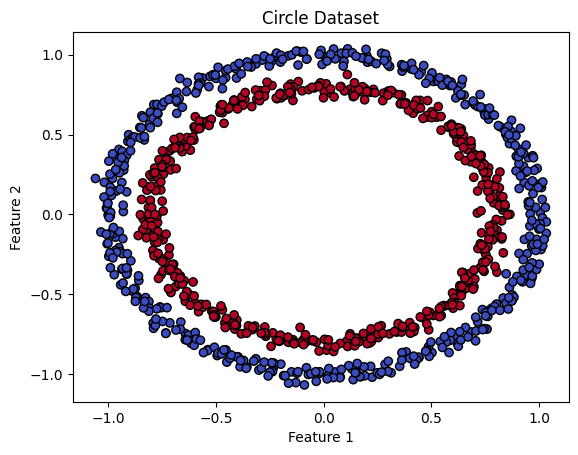

In [3]:
#Data visualizing : when it little hard to understand visualize visualize
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Circle Dataset")
plt.show()

In [4]:
#Input and Output shapes
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [5]:
print(X[0].shape)

(2,)


In [7]:
X_train = X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]

In [9]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [12]:
#Building The model
tf.random.set_seed(42)
from tensorflow.keras.utils import to_categorical

y_one_hot = to_categorical(y_train, num_classes=2)


#Create the Seq model
model = tf.keras.Sequential([
    tf.keras.Input(shape = X[0].shape), # Because we are passing each value in X. so it should be in the same shape as elements in X
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(2 , activation = "sigmoid")
])

#Model compilation
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

#Fit model
model.fit(X_train,y_one_hot,epochs=50 , verbose = 0)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158 (636.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106 (428.00 B)

In [14]:
model.evaluate(X_test , to_categorical(y_test, num_classes=2))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0567  


[0.057110682129859924, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


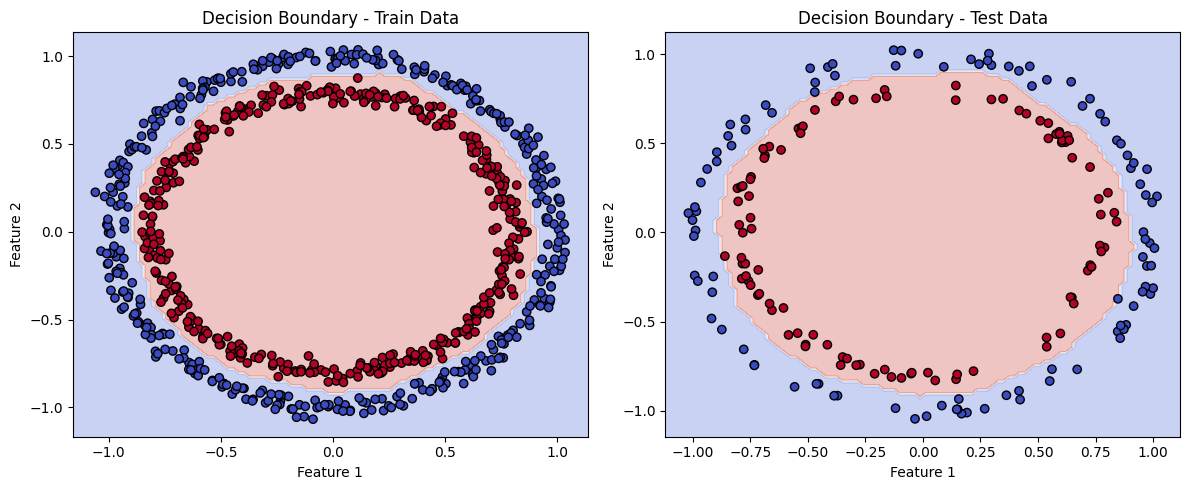

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, ax, title, cmap="coolwarm"):
    # Define a grid over the input feature space
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict over the grid
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_grid)

    # Convert probabilities to class labels if necessary
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:  # Multi-class
        y_pred = np.argmax(y_pred, axis=1)
    else:  # Binary classification
        y_pred = (y_pred > 0.5).astype(int)

    # Reshape predictions back to the mesh shape
    y_pred = y_pred.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, y_pred, alpha=0.3, cmap=cmap)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors="k")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(title)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundaries for training and test sets
plot_decision_boundary(model, X_train, y_train, axes[0], "Decision Boundary - Train Data")
plot_decision_boundary(model, X_test, y_test, axes[1], "Decision Boundary - Test Data")

plt.tight_layout()
plt.show()


##Classification evaluation methods
1. Accuracy
2. Precision
3. Recall
4. F1 score
5. Confusion Matrix


In [25]:
#Normal Evaluation
loss , accuracy = model.evaluate(X_test , to_categorical(y_test, num_classes=2))
print(f"Accuracy : {accuracy*100}")
print(f"Loss : {loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0567 
Accuracy : 100.0
Loss : 0.057110682129859924


In [36]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test) # here predications comes as probabilities. That is the output of sigmoid
#print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


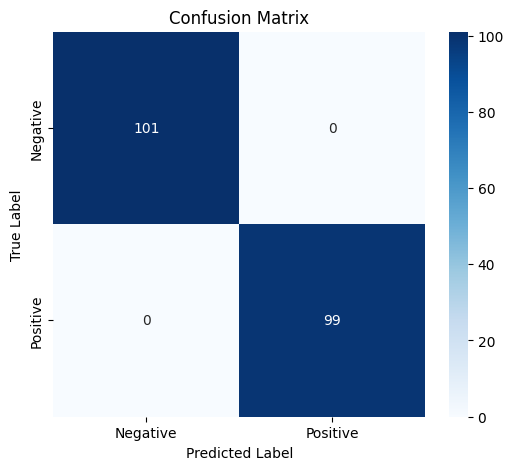

In [38]:
#Confusion Plot

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



#Multiclass Classification
when you have more than two class it is multi class clasification